<a href="https://colab.research.google.com/github/mrmamadi/regression10/blob/Notebook/Copy_of_Report_Scratch_Pad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract


# Table of contents(ToC)



# 1. Introduction
```
- Summarize the purpose of the report and summarize the data / subject.
- Include important contextual information about the reason for the report.
- Summarize your analysis questions, your conclusions, and briefly outline the report
```

<font color='red'> I think the first couple of slides from Thabo should go here. Very brief problem statement stuff </font>



# 2. Data
- Include written descriptions of data and follow with relevant spreadsheets or variables in the data source.

All data is aqcuired from Zindi

# 3. Methodology Section
```
- Contains methods used in the report.
```
Atleast 4 different linear models were developed with different approaches. The models are based on different hypothesis identified during data cleaning and data analysis.

<font color='green'> Can use MSE becuase that's what Zindi uses to evaluate</font>

# 4. Modelling 

## 4.1 Model1
- Feature engineering and modelling



### Data Preprocessing


#### Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import seaborn as sns

#### Import Data


In [0]:
train_set = pd.read_csv('Train.csv')
unseen_set = pd.read_csv('Test.csv')
riders_set = pd.read_csv('Riders.csv')

In [0]:
train_set.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

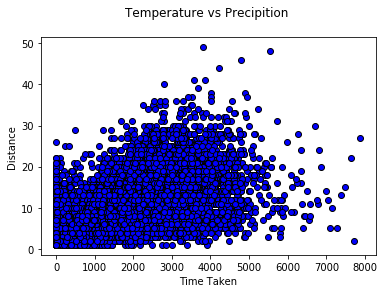

In [0]:
plt.scatter(x=train_set['Time from Pickup to Arrival'],y=train_set['Distance (KM)'],color='blue',edgecolor='k')
plt.xlabel('Time Taken')
plt.ylabel('Distance')

plt.title('Time vs Distnace \n')

plt.show()

In [0]:
train_set.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [0]:
# Store columns present in Train.csv but not in Test.csv
# To be used later as dependent variable vectors

dep_var = []

for i in train_set.columns.tolist():
    if i in unseen_set.columns.tolist():
        pass
    else:
        dep_var.append(i)
        
dep_var

['Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Arrival at Destination - Time',
 'Time from Pickup to Arrival']

In [0]:
train_set.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
train_set.columns = [col.replace(" ","_") for col in train_set.columns] 
train_set.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
# Order No is the main identifier variable for each row
# Set Order No column as index

train_set = train_set.set_index('Order_No')
train_set.head()

,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


#### Taking care of missing data

In [0]:
# Replace NaNs in Temperature and Precipitation with column specific mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_set.iloc[:, 20:22])
train_set.iloc[:, 20:22] = imputer.transform(train_set.iloc[:, 20:22])

train_set.head()

,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,12:17:22 PM,16,26.400000,7.905797,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,1:00:38 PM,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,10:05:27 AM,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,10:25:37 AM,9,15.400000,7.905797,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


#### Dealing with categorical data

In [0]:
# Dummy encode catergorical values in 'Vehicle Type' and 'Personal or Business' columns

train_set = pd.get_dummies(train_set, columns = ['Personal_or_Business', 'Vehicle_Type'], drop_first=True)
train_set.head()

,User_Id,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,3,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0
Order_No_25375,User_Id_2285,3,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,16,26.400000,7.905797,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1
Order_No_1899,User_Id_265,3,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0
Order_No_9336,User_Id_1402,3,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0
Order_No_27883,User_Id_1737,1,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,9,15.400000,7.905797,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1


In [0]:
# Convert string of time into 24 hour datetime and extract hour variable

train_set['Placement_-_Time'] = pd.to_datetime(train_set['Placement_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Confirmation_-_Time'] = pd.to_datetime(train_set['Confirmation_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(train_set['Arrival_at_Pickup_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Pickup_-_Time'] = pd.to_datetime(train_set['Pickup_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Arrival_at_Destination_-_Time'] = pd.to_datetime(train_set['Arrival_at_Destination_-_Time']).dt.strftime('%H')#:%M:%S')

train_set.head()

,User_Id,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,3,9,5,09,9,5,09,9,5,...,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0
Order_No_25375,User_Id_2285,3,12,5,11,12,5,11,12,5,...,16,26.400000,7.905797,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1
Order_No_1899,User_Id_265,3,30,2,12,30,2,12,30,2,...,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0
Order_No_9336,User_Id_1402,3,15,5,09,15,5,09,15,5,...,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0
Order_No_27883,User_Id_1737,1,13,1,09,13,1,09,13,1,...,9,15.400000,7.905797,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1


In [0]:
# Extract only int value from 'User Id' string

train_set['User_Id'] = [train_set['User_Id'][i][8:] for i in range(len(train_set))]

In [0]:
# Extract only int value from 'Rider Id' string

train_set['Rider_Id'] = [train_set['Rider_Id'][i][9:] for i in range(len(train_set))]

Doesn't make sense to only take int value, as the original value within the column is simply a label not a magnitude against which the dependent variable can be measured

In [0]:
train_set.head()

,User_Id,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,633,3,9,5,09,9,5,09,9,5,...,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,432,745,0
Order_No_25375,2285,3,12,5,11,12,5,11,12,5,...,16,26.400000,7.905797,-1.351453,36.899315,-1.295004,36.814358,856,1993,1
Order_No_1899,265,3,30,2,12,30,2,12,30,2,...,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,155,455,0
Order_No_9336,1402,3,15,5,09,15,5,09,15,5,...,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,855,1341,0
Order_No_27883,1737,1,13,1,09,13,1,09,13,1,...,9,15.400000,7.905797,-1.266597,36.792118,-1.295041,36.809817,770,1214,1


In [0]:
# Reordering dataframe for seperation into independent and dependent variables

dep_var = [col.replace(" ","_") for col in dep_var]
train_set = train_set[[c for c in train_set if c not in dep_var] 
       + dep_var]
train_set.head()

,User_Id,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Personal_or_Business_Personal,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,633,3,9,5,09,9,5,09,9,5,...,-1.317755,36.830370,-1.300406,36.829741,432,0,9,5,10,745
Order_No_25375,2285,3,12,5,11,12,5,11,12,5,...,-1.351453,36.899315,-1.295004,36.814358,856,1,12,5,12,1993
Order_No_1899,265,3,30,2,12,30,2,12,30,2,...,-1.308284,36.843419,-1.300921,36.828195,155,0,30,2,13,455
Order_No_9336,1402,3,15,5,09,15,5,09,15,5,...,-1.281301,36.832396,-1.257147,36.795063,855,0,15,5,10,1341
Order_No_27883,1737,1,13,1,09,13,1,09,13,1,...,-1.266597,36.792118,-1.295041,36.809817,770,1,13,1,10,1214


In [0]:
# Storing data as variables

X = train_set.iloc[:, :-4].values
y = train_set.iloc[:, -4:].values

#### Splitting the dataset into the Training set and Validation set

In [0]:
# Creating a validation set from the data

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Training the Multiple Linear Regression model on the Training set

In [0]:
# Training model on training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results

In [0]:
# Storing predicted dependent variable results from set of validation features

y_pred = regressor.predict(X_val)

In [0]:
y_pred

array([[7.00000000e+00, 1.00000000e+00, 9.50706209e+00, 1.28583273e+03],
       [3.00000000e+00, 3.00000000e+00, 1.41152986e+01, 3.24673494e+03],
       [2.40000000e+01, 4.00000000e+00, 1.30938976e+01, 1.24549983e+03],
       ...,
       [4.00000000e+00, 2.00000000e+00, 1.49712089e+01, 9.01474847e+02],
       [1.10000000e+01, 1.00000000e+00, 1.39597858e+01, 9.03654016e+02],
       [1.50000000e+01, 1.00000000e+00, 1.64397337e+01, 1.10108931e+03]])

In [0]:
y_val

array([[7, 1, '09', 1123],
       [3, 3, '15', 5993],
       [24, 4, '13', 907],
       ...,
       [4, 2, '15', 910],
       [11, 1, '14', 916],
       [15, 1, '17', 1739]], dtype=object)

### Evaluating Regression Model

In [0]:
# Displaying Root Mean Squared Error comparing actual values to the predicted values

from sklearn import metrics
from math import sqrt

print('RMSE:', sqrt(metrics.mean_squared_error(y_val[:,3], y_pred[:,3])))

RMSE: 786.190660788681


In [0]:
X_names = train_set.iloc[:, :-4].columns
y_names = train_set.iloc[:, -4:].columns

formula_str = y_names +" ~ "+" + ".join(X_names);
#print('Formula:\n\t {}'.format(formula_str))

for b in y_names.tolist():
    print (b)

Arrival_at_Destination_-_Day_of_Month
Arrival_at_Destination_-_Weekday_(Mo_=_1)
Arrival_at_Destination_-_Time
Time_from_Pickup_to_Arrival


Having fit our model to the provided training data, we can now inspect its coefficients to get a better understanding of their influence on the predictions the model will provide:


In [0]:
#Intercept for last column ('Time from Pickup to Arrival')
beta_0 = float(regressor.intercept_[-1])
beta_0



44943.47748014676

In [0]:
#Coeffecients for last column ('Time from Pickup to Arrival')

pd.DataFrame(regressor.coef_[-1,:],train_set.iloc[:, :-4].columns, columns=['Coeffecient'])

,Coeffecient
User_Id,0.010151
Platform_Type,21.649136
Placement_-_Day_of_Month,-190.674607
Placement_-_Weekday_(Mo_=_1),-188.750575
Placement_-_Time,-96.925879
Confirmation_-_Day_of_Month,63.245096
Confirmation_-_Weekday_(Mo_=_1),65.169128
Confirmation_-_Time,19.054051
Arrival_at_Pickup_-_Day_of_Month,63.245096
Arrival_at_Pickup_-_Weekday_(Mo_=_1),65.169128


### Predicting the unseen data results

In [0]:
# Storing unchanged unseen data in new variable

unseen_set = pd.read_csv('Test.csv')
unseen_set.columns = [col.replace(" ","_") for col in unseen_set.columns] 
unseen_set.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
# Performing identical transformations on relevant columns in unseen data to have comparable data as features

unseen_set = unseen_set.set_index('Order_No')

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(unseen_set.iloc[:,17:19])
unseen_set.iloc[:, 17:19] = imputer.transform(unseen_set.iloc[:, 17:19])

unseen_set = pd.get_dummies(unseen_set, columns = ['Personal_or_Business', 'Vehicle_Type'], drop_first=True)

unseen_set['Placement_-_Time'] = pd.to_datetime(unseen_set['Placement_-_Time']).dt.strftime('%H')#:%M:%S')
unseen_set['Confirmation_-_Time'] = pd.to_datetime(unseen_set['Confirmation_-_Time']).dt.strftime('%H')#:%M:%S')
unseen_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(unseen_set['Arrival_at_Pickup_-_Time']).dt.strftime('%H')#:%M:%S')
unseen_set['Pickup_-_Time'] = pd.to_datetime(unseen_set['Pickup_-_Time']).dt.strftime('%H')#:%M:%S')

unseen_set['User_Id'] = [unseen_set['User_Id'][i][8:] for i in range(len(unseen_set))]

unseen_set['Rider_Id'] = [unseen_set['Rider_Id'][i][9:] for i in range(len(unseen_set))]

unseen_set.head()

,User_Id,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Personal_or_Business_Personal
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_19248,3355,3,27,3,16,27,3,16,27,3,...,17,8,23.24612,6.651759,-1.333275,36.870815,-1.305249,36.822390,192,0
Order_No_12736,3647,3,17,5,12,17,5,12,17,5,...,13,5,23.24612,6.651759,-1.272639,36.794723,-1.277007,36.823907,868,0
Order_No_768,2154,3,27,4,11,27,4,11,27,4,...,11,5,22.80000,6.651759,-1.290894,36.822971,-1.276574,36.851365,26,0
Order_No_15332,2910,3,17,1,13,17,1,13,17,1,...,14,5,24.50000,6.651759,-1.290503,36.809646,-1.303382,36.790658,685,0
Order_No_21373,1205,3,11,2,11,11,2,11,11,2,...,11,6,24.40000,6.651759,-1.281081,36.814423,-1.266467,36.792161,858,0


In [0]:
# Storing all columns as features

X_test = unseen_set.values

In [0]:
# Storing predicted dependant variables from predictions made from modelling the unseen data

sub_pred = regressor.predict(X_test)

In [0]:
sub_pred

array([[2.70000000e+01, 3.00000000e+00, 1.70780007e+01, 1.21328276e+03],
       [1.70000000e+01, 5.00000000e+00, 1.31447244e+01, 1.22663406e+03],
       [2.70000000e+01, 4.00000000e+00, 1.14625971e+01, 1.01523325e+03],
       ...,
       [5.00000000e+00, 3.00000000e+00, 1.52968628e+01, 1.72357432e+03],
       [2.90000000e+01, 2.00000000e+00, 1.58310105e+01, 2.62638407e+03],
       [4.00000000e+00, 2.00000000e+00, 1.60496042e+01, 1.31717137e+03]])

In [0]:
# Displaying predicted variables as part of dataframe

unseen_set['Arrival_at_Destination_-_Day_of_Month'] = sub_pred[:,0]
unseen_set['Arrival_at_Destination_-_Weekday_(Mo = 1)'] = sub_pred[:,1]
unseen_set['Arrival_at_Destination_-_Time'] = sub_pred[:,2]
unseen_set['Time_from_Pickup_to_Arrival'] = sub_pred[:,3]
            
unseen_set.head()

,User_Id,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Personal_or_Business_Personal,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo = 1),Arrival_at_Destination_-_Time,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_19248,3355,3,27,3,16,27,3,16,27,3,...,-1.333275,36.870815,-1.305249,36.822390,192,0,27.0,3.0,17.078001,1213.282763
Order_No_12736,3647,3,17,5,12,17,5,12,17,5,...,-1.272639,36.794723,-1.277007,36.823907,868,0,17.0,5.0,13.144724,1226.634059
Order_No_768,2154,3,27,4,11,27,4,11,27,4,...,-1.290894,36.822971,-1.276574,36.851365,26,0,27.0,4.0,11.462597,1015.233248
Order_No_15332,2910,3,17,1,13,17,1,13,17,1,...,-1.290503,36.809646,-1.303382,36.790658,685,0,17.0,1.0,14.144518,1194.278840
Order_No_21373,1205,3,11,2,11,11,2,11,11,2,...,-1.281081,36.814423,-1.266467,36.792161,858,0,11.0,2.0,11.505461,1166.181539


### Building a more accurate model!

Explanation of why I find it necessary make to changes to what features were used, what imputations were made etc

#### Importing Data

In [0]:
train_set = pd.read_csv('Train.csv')
unseen_set = pd.read_csv('Test.csv')
riders_set = pd.read_csv('Riders.csv')

In [0]:
# Store columns present in Train.csv but not in Test.csv
# To be used later as dependent variable vectors

dep_var = []

for i in train_set.columns.tolist():
    if i in unseen_set.columns.tolist():
        pass
    else:
        dep_var.append(i)
        
dep_var

['Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Arrival at Destination - Time',
 'Time from Pickup to Arrival']

In [0]:
train_set.columns = [col.replace(" ","_") for col in train_set.columns] 
train_set.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
train_set.describe()

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


#### Cleaning Data

##### Taking care of missing data

minimum precipitation measured is 0.1mm


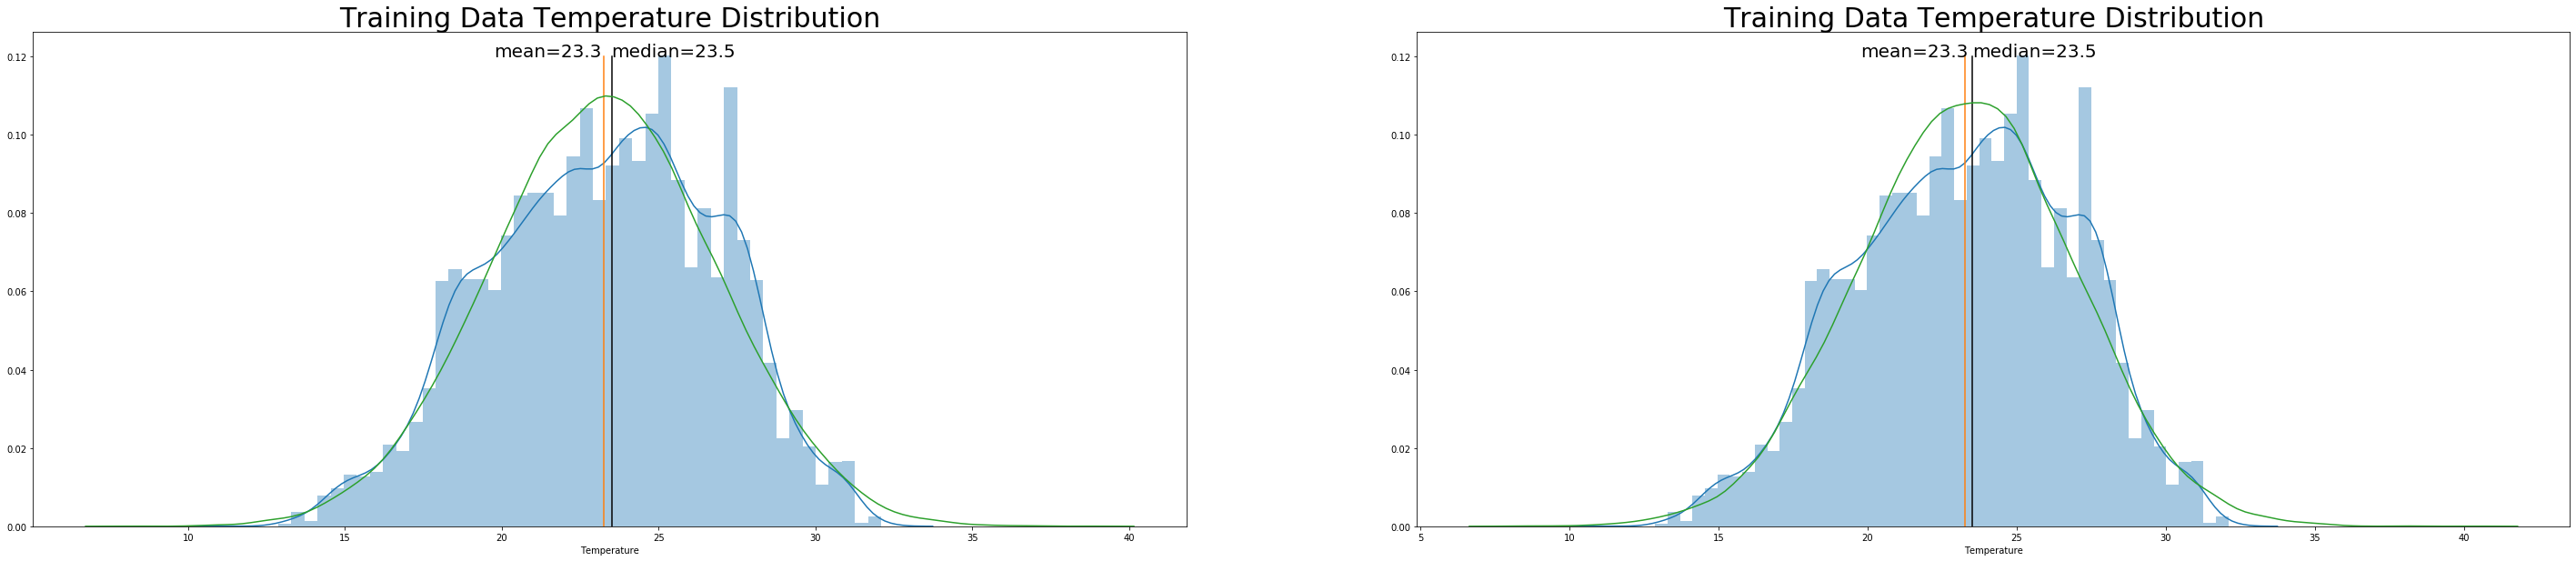

In [0]:
from matplotlib import rcParams

# @title Check Precipitation and temperature columns
rain = train_set["Precipitation_in_millimeters"]
print(f"minimum precipitation measured is {rain.min()}mm")

rcParams['figure.figsize'] = 50, 10

f, axes = plt.subplots(1, 2)

temps = train_set['Temperature']
sns.distplot(temps, ax=axes[0])
axes[0].plot([temps.mean(), temps.mean()],[0,0.12])
axes[0].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[0].text(x=temps.median(),y=.12, s=f'median={temps.median()}', fontsize=20)
axes[0].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[0])
axes[0].set_title('Training Data Temperature Distribution', fontsize=30)

temps = train_set['Temperature']
sns.distplot(temps, ax=axes[1])
axes[1].plot([temps.mean(), temps.mean()],[0,0.12])
axes[1].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[1].text(temps.median(),.12, f'median={temps.median()}', fontsize=20)
axes[1].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[1])
axes[1].set_title('Training Data Temperature Distribution', fontsize=30)
plt.show()

In [0]:
train_set.isnull().sum()

Order_No                                         0
User_Id                                          0
Vehicle_Type                                     0
Platform_Type                                    0
Personal_or_Business                             0
Placement_-_Day_of_Month                         0
Placement_-_Weekday_(Mo_=_1)                     0
Placement_-_Time                                 0
Confirmation_-_Day_of_Month                      0
Confirmation_-_Weekday_(Mo_=_1)                  0
Confirmation_-_Time                              0
Arrival_at_Pickup_-_Day_of_Month                 0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)             0
Arrival_at_Pickup_-_Time                         0
Pickup_-_Day_of_Month                            0
Pickup_-_Weekday_(Mo_=_1)                        0
Pickup_-_Time                                    0
Arrival_at_Destination_-_Day_of_Month            0
Arrival_at_Destination_-_Weekday_(Mo_=_1)        0
Arrival_at_Destination_-_Time  

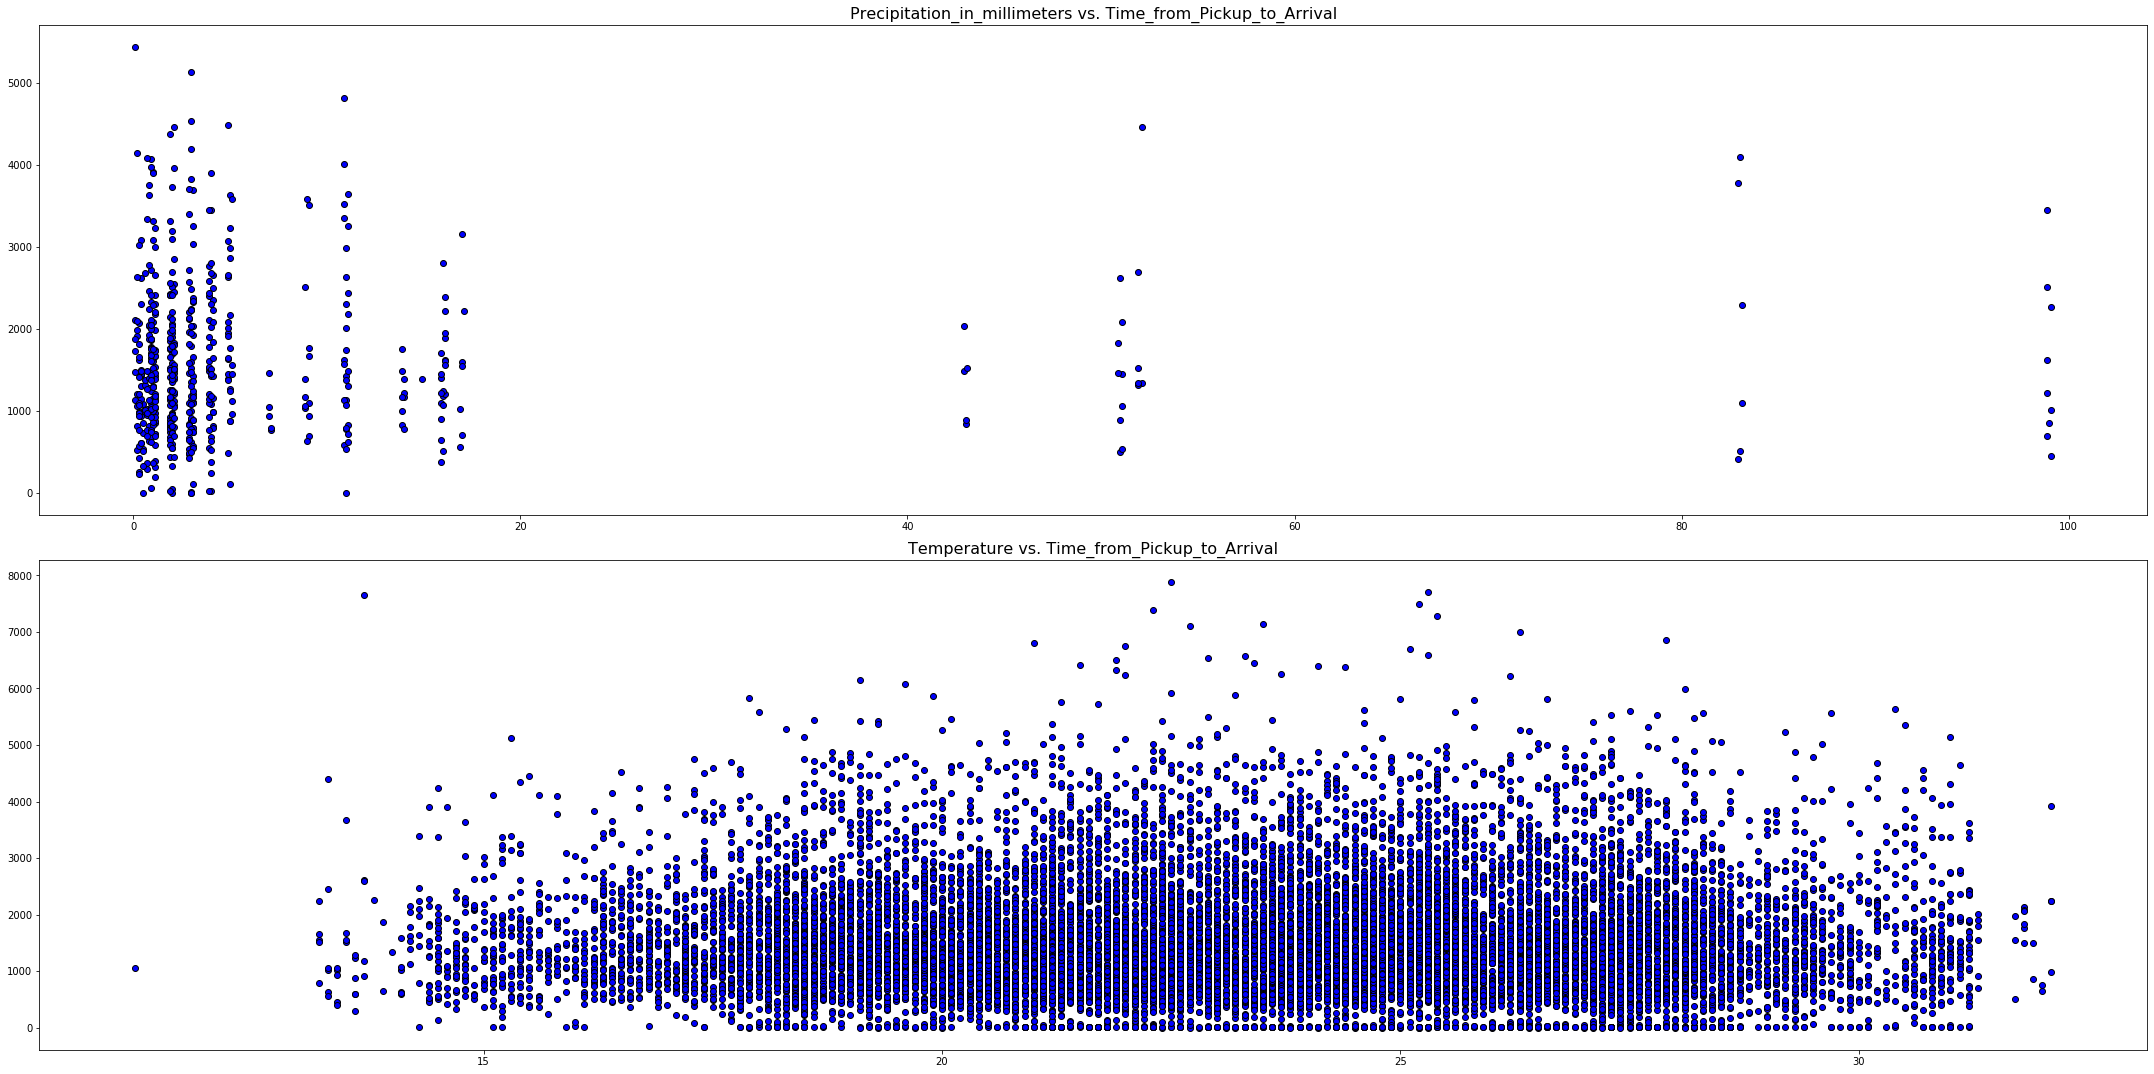

In [0]:
fig, axs = plt.subplots(2,1, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.iloc[:,-8:-6].columns):
    axs[index-1].set_title("{} vs. Time_from_Pickup_to_Arrival".format(column),fontsize=16)
    axs[index-1].scatter(x=train_set.iloc[:,-8:-6][column],y=train_set['Time_from_Pickup_to_Arrival'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [0]:
train_set.iloc[:,-8:-6].describe()

,Temperature,Precipitation_in_millimeters
count,16835.000000,552.000000
mean,23.258889,7.905797
std,3.615768,17.089971
min,11.200000,0.100000
25%,20.600000,1.075000
50%,23.500000,2.900000
75%,26.000000,4.900000
max,32.100000,99.100000


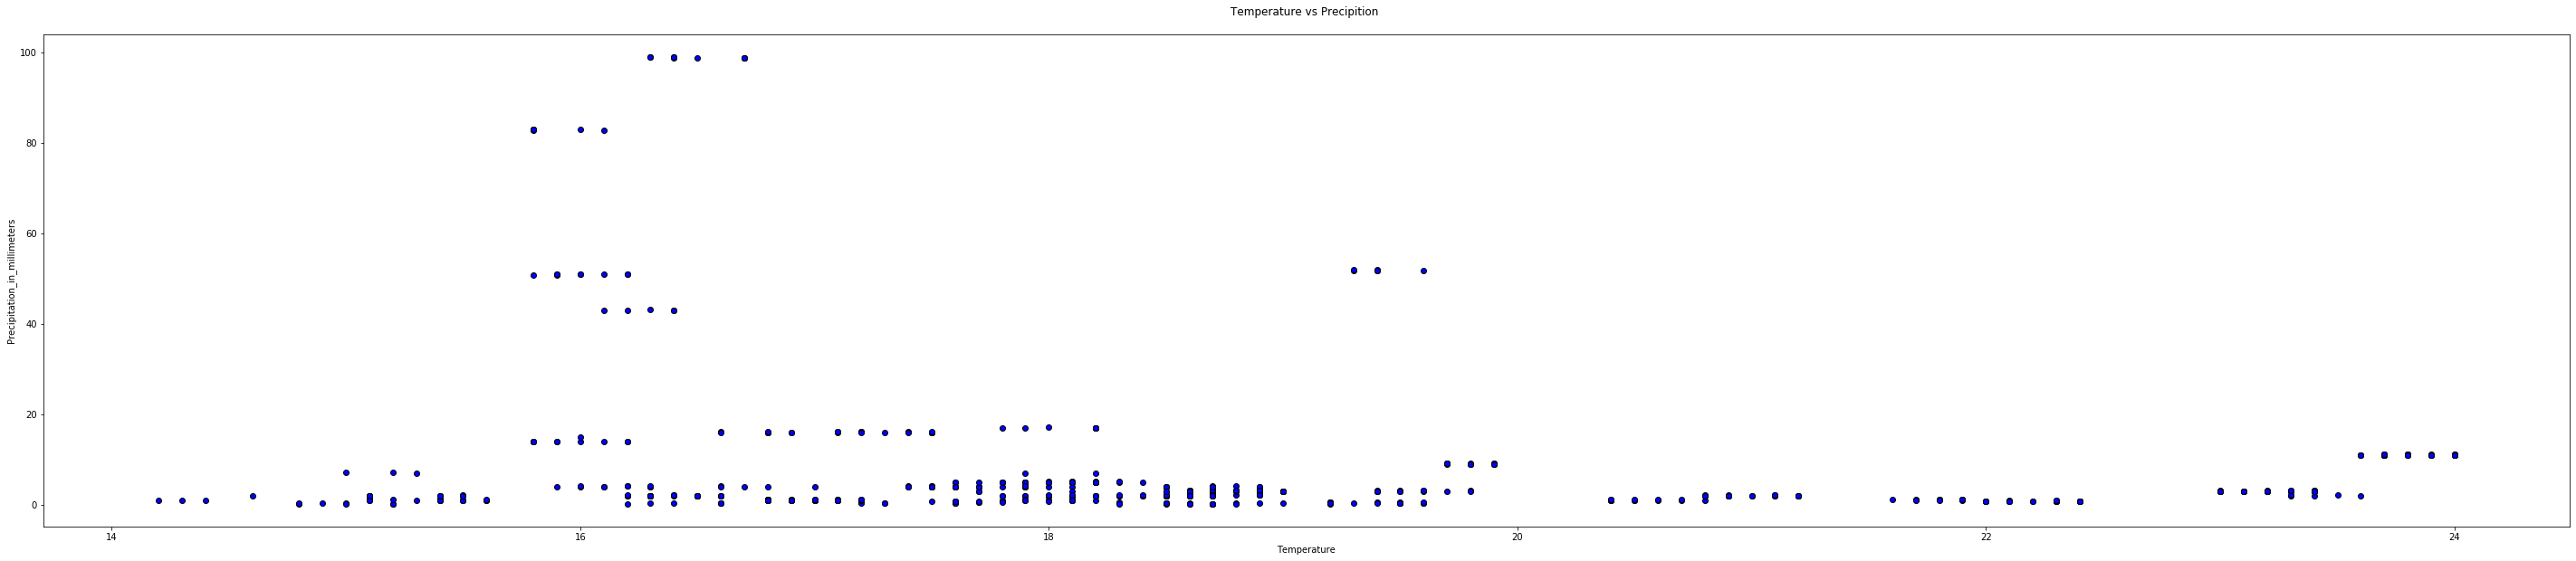

In [0]:
plt.scatter(x=train_set['Temperature'],y=train_set['Precipitation_in_millimeters'],color='blue',edgecolor='k')
plt.xlabel('Temperature')
plt.ylabel('Precipitation_in_millimeters')

plt.title('Temperature vs Precipition \n')

plt.show()

##### Are nulls in precipitation column empty because data wasnt recorded, or because it didnt rain?

In [0]:
train_set.isnull().sum()

Order_No                                         0
User_Id                                          0
Vehicle_Type                                     0
Platform_Type                                    0
Personal_or_Business                             0
Placement_-_Day_of_Month                         0
Placement_-_Weekday_(Mo_=_1)                     0
Placement_-_Time                                 0
Confirmation_-_Day_of_Month                      0
Confirmation_-_Weekday_(Mo_=_1)                  0
Confirmation_-_Time                              0
Arrival_at_Pickup_-_Day_of_Month                 0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)             0
Arrival_at_Pickup_-_Time                         0
Pickup_-_Day_of_Month                            0
Pickup_-_Weekday_(Mo_=_1)                        0
Pickup_-_Time                                    0
Arrival_at_Destination_-_Day_of_Month            0
Arrival_at_Destination_-_Weekday_(Mo_=_1)        0
Arrival_at_Destination_-_Time  

In [0]:
# Replace NaNs in Temperature with column specific mean


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imputer.fit(train_set.iloc[:,-8:-7])
train_set.iloc[:,-8:-7] = imputer.transform(train_set.iloc[:,-8:-7])

imputer2.fit(train_set.iloc[:,-7:-6])
train_set.iloc[:,-7:-6] = imputer2.transform(train_set.iloc[:,-7:-6])

train_set.head()


,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


###### Explain why I chose replace with zero over mean, GRAPHICALLY. CORR MAP?

Stated that's it measured every 3 hours. If null- no measurement-

Consider grouping temperature imputation by time

##### Dealing with categorical columns

In [0]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order_No                                   21201 non-null  object 
 1   User_Id                                    21201 non-null  object 
 2   Vehicle_Type                               21201 non-null  object 
 3   Platform_Type                              21201 non-null  int64  
 4   Personal_or_Business                       21201 non-null  object 
 5   Placement_-_Day_of_Month                   21201 non-null  int64  
 6   Placement_-_Weekday_(Mo_=_1)               21201 non-null  int64  
 7   Placement_-_Time                           21201 non-null  object 
 8   Confirmation_-_Day_of_Month                21201 non-null  int64  
 9   Confirmation_-_Weekday_(Mo_=_1)            21201 non-null  int64  
 10  Confirmation_-_Time   

###### Encoding Categorical Columns

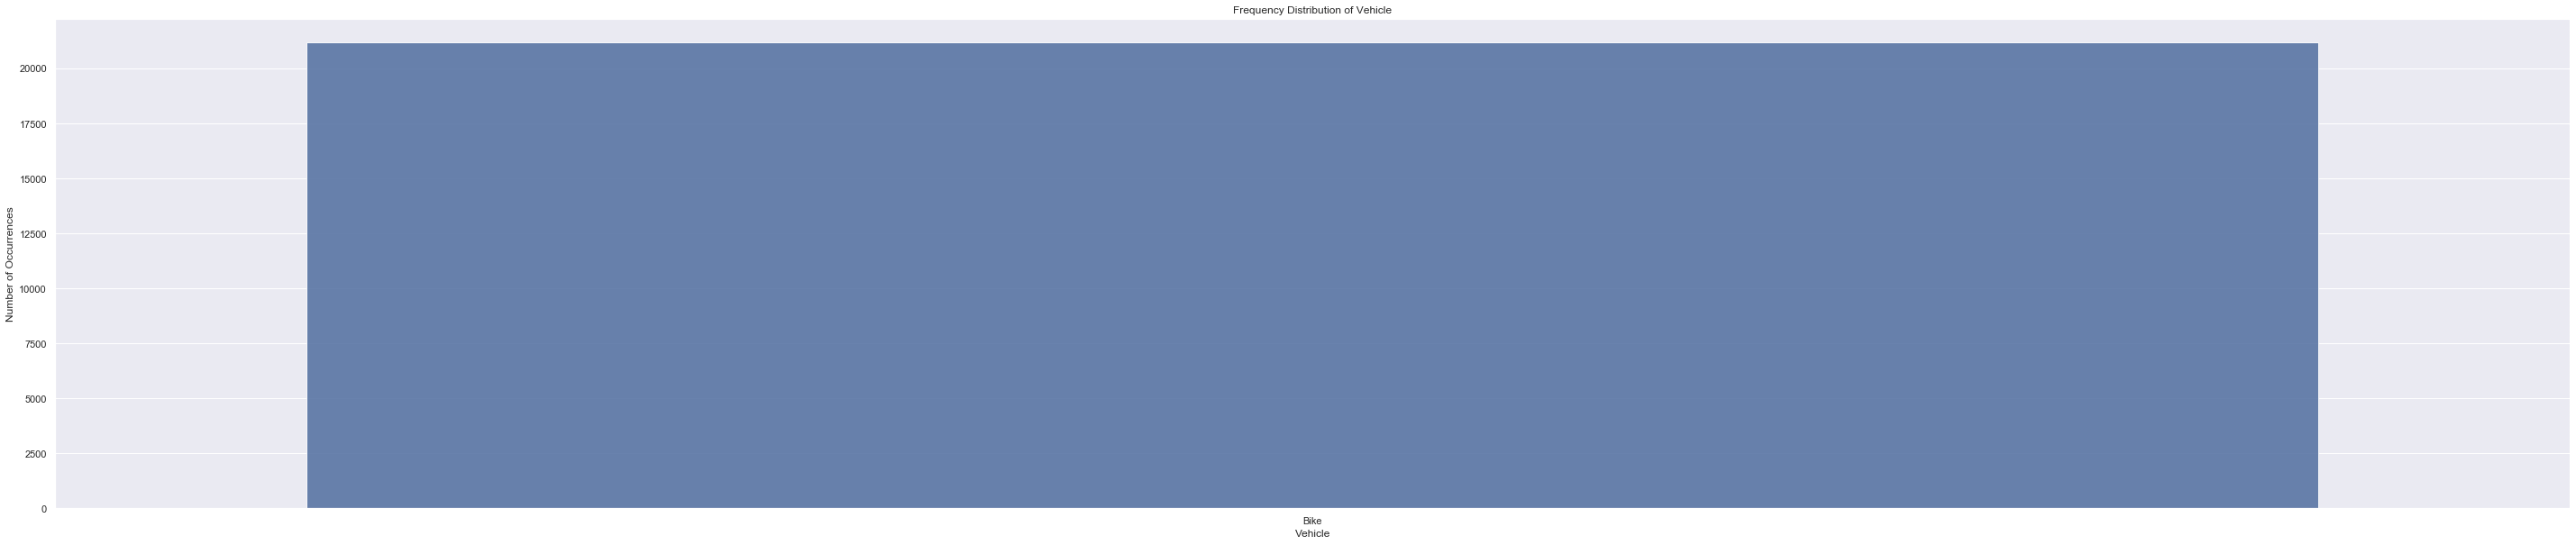

In [0]:
vehicle_count = train_set['Vehicle_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vehicle_count.index, vehicle_count.values, alpha=0.9)
plt.title('Frequency Distribution of Vehicle')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle', fontsize=12)
plt.show()

Stated in information on Zindy that only vehicle type used is a bike

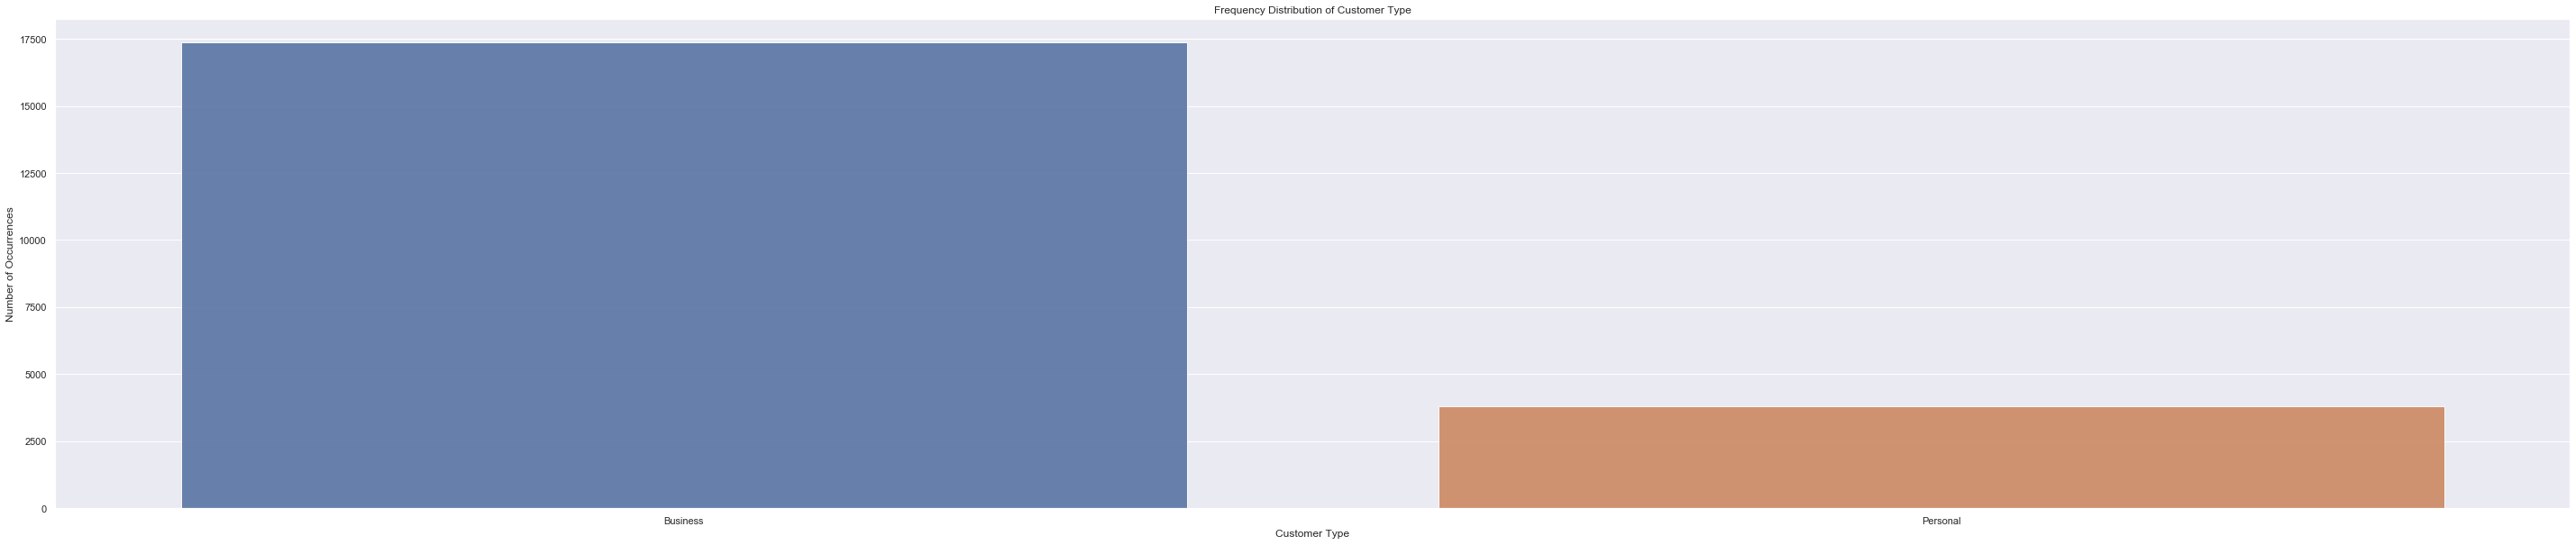

In [0]:
custtype_count = train_set['Personal_or_Business'].value_counts()
sns.set(style="darkgrid")
sns.barplot(custtype_count.index, custtype_count.values, alpha=0.9)
plt.title('Frequency Distribution of Customer Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Customer Type', fontsize=12)
plt.show()

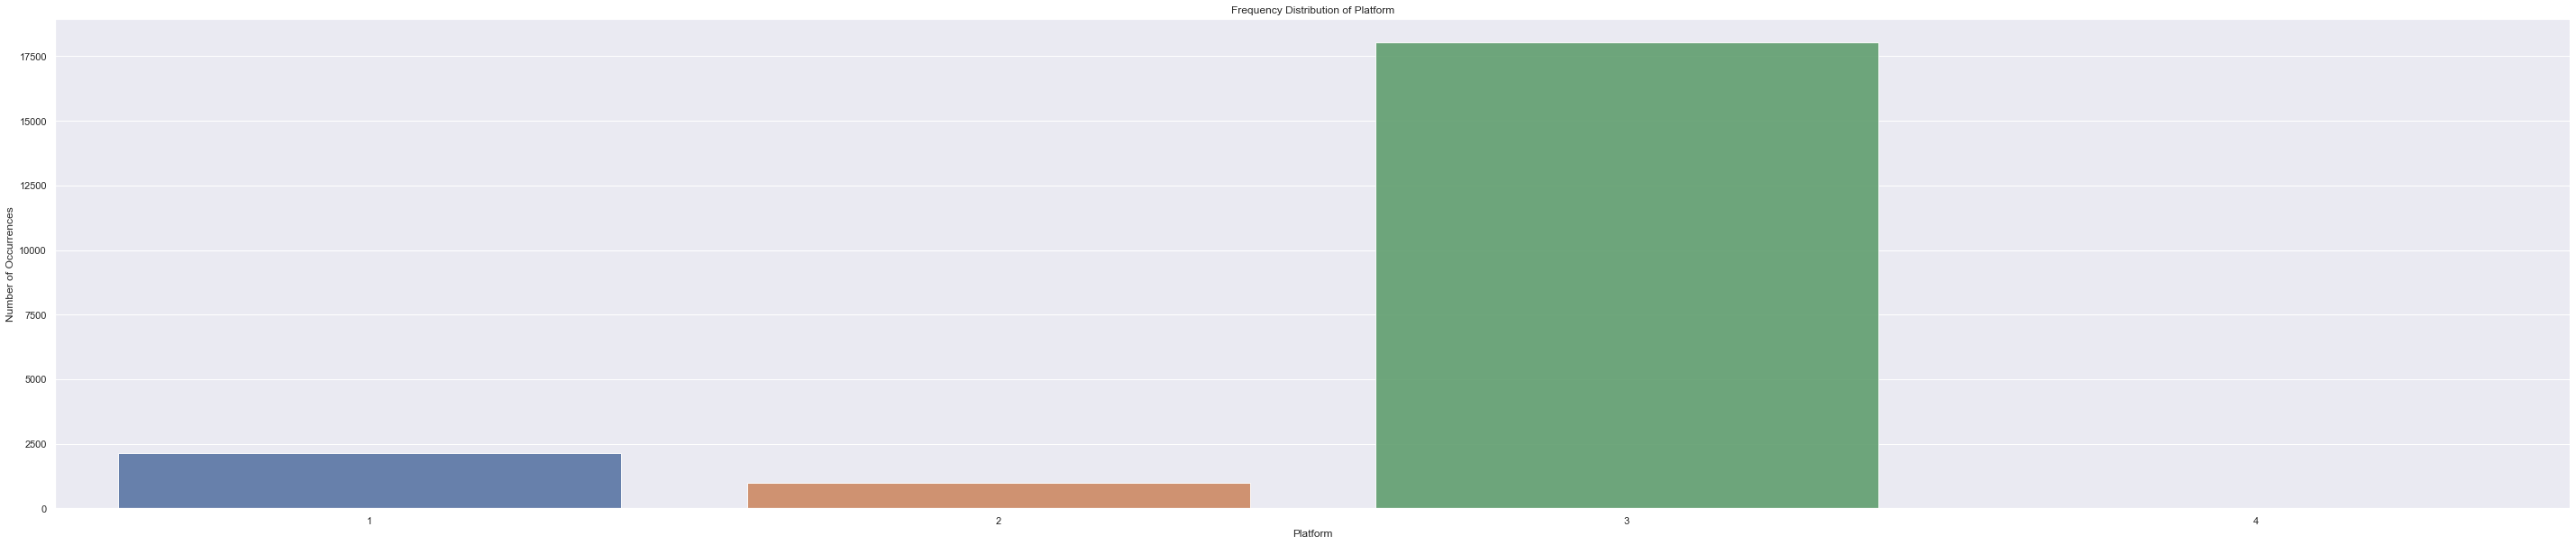

In [0]:
platform_count = train_set['Platform_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(platform_count.index, platform_count.values, alpha=0.9)
plt.title('Frequency Distribution of Platform')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.show()

Does using platform labelled 3 have 3 times more weight than using platform labelled 1? No. Therefore should be one hot encoded

Not necessary t dummy encode personal or business. use label encoder or do it manually

In [0]:
# Dummy encode catergorical values in 'Vehicle Type' and 'Personal or Business' columns

train_set = pd.get_dummies(train_set, columns = ['Personal_or_Business', 'Vehicle_Type', 'Platform_Type'], drop_first=True)
train_set.head()

,Order_No,User_Id,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4
0,Order_No_4211,User_Id_633,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0,0,1,0
1,Order_No_25375,User_Id_2285,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1,0,1,0
2,Order_No_1899,User_Id_265,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0,0,1,0
3,Order_No_9336,User_Id_1402,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0,0,1,0
4,Order_No_27883,User_Id_1737,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1,0,0,0


###### Categorical with High Cardinality

Need to deal with categorical columns with high cardinality ('Order_No, 'User_Id','Rider_Id')


Can't One-hot encode. Number of parameters will exceed number of observations... Lead to unidentifiable model

In [0]:
# Order No is the main identifier variable for each row
# Set Order No column as index


train_set = train_set.set_index('Order_No')
train_set[['User_Id','Rider_Id']].head()

,User_Id,Rider_Id
Order_No,,
Order_No_4211,User_Id_633,Rider_Id_432
Order_No_25375,User_Id_2285,Rider_Id_856
Order_No_1899,User_Id_265,Rider_Id_155
Order_No_9336,User_Id_1402,Rider_Id_855
Order_No_27883,User_Id_1737,Rider_Id_770


In [0]:
train_set[['User_Id','Rider_Id']].nunique()

User_Id     3186
Rider_Id     924
dtype: int64

Can I replace User_Id with the number of times it appears (orders it made)? Or rather as a fraction of total orders made in the period?


In [0]:
user_id = (train_set.groupby('User_Id').count().iloc[:,0])
user_id.describe()

count    3186.000000
mean        6.654426
std        24.982798
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       645.000000
Name: Placement_-_Day_of_Month, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24029e4ef88>,
 'caps': [<matplotlib.lines.Line2D at 0x24029e52f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x24029e4e488>],
 'medians': [<matplotlib.lines.Line2D at 0x24029e56a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24029e5ba08>],
 'means': []}

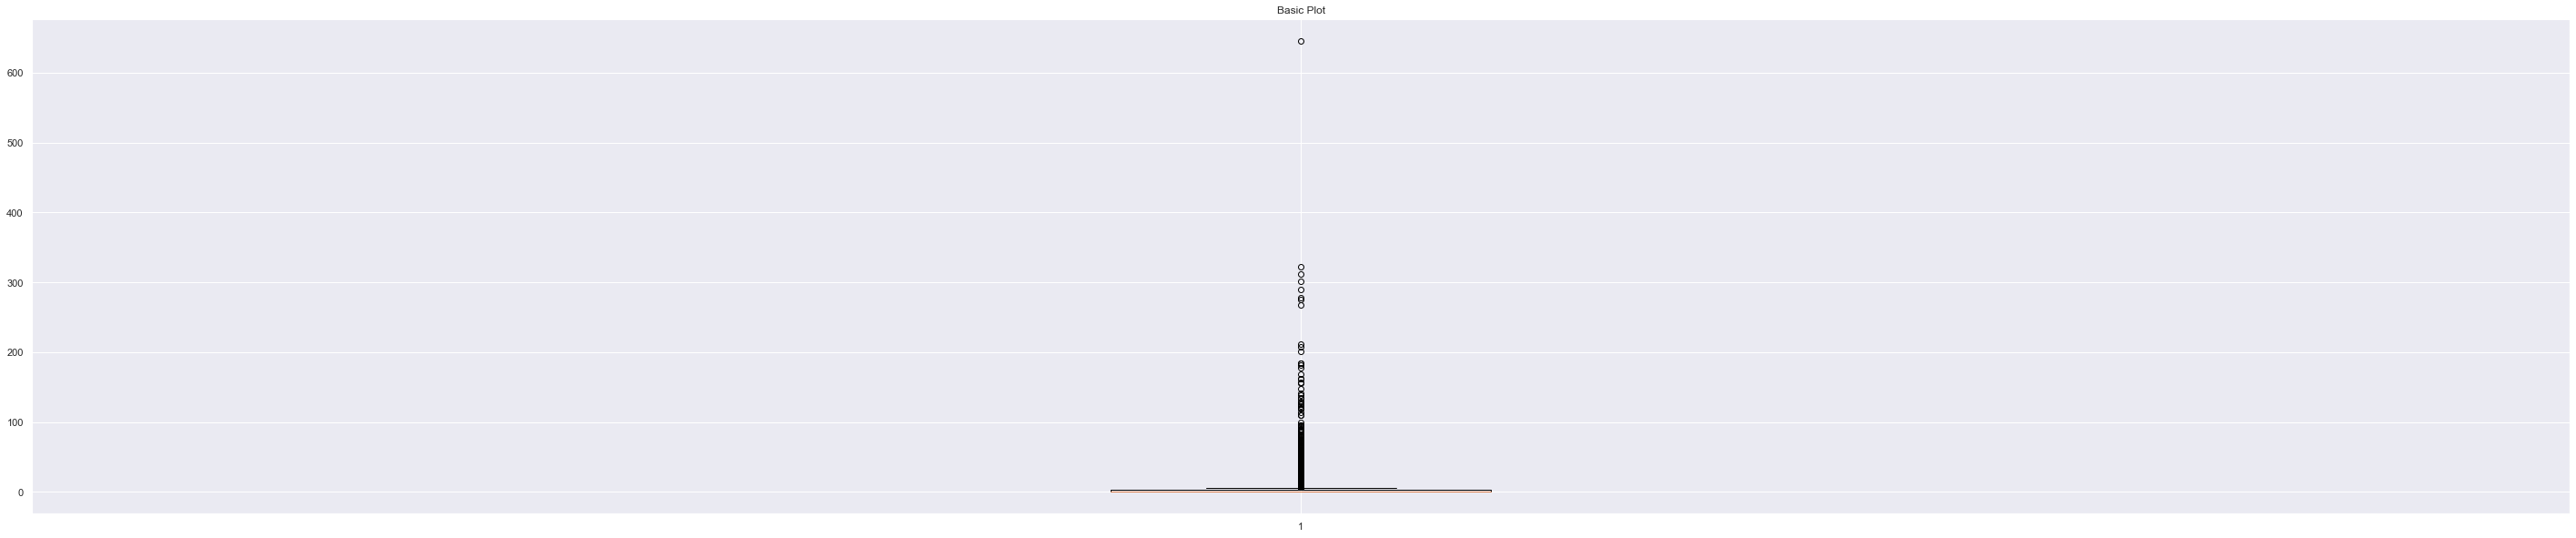

In [0]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(user_id)

In [0]:
train_set['Proportion_of_total_order'] = [float(user_id[train_set['User_Id'][i]])**(-1) for i in range(len(train_set))]
train_set = train_set.drop(['User_Id'], axis='columns')
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,0,0,1,0,0.005495
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1,0,1,0,0.125000
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,...,36.843419,-1.300921,36.828195,Rider_Id_155,455,0,0,1,0,0.006173
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,...,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0,0,1,0,0.013514
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,...,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1,0,0,0,1.000000


Can I replace Rider_Id with Rider Rating?

In [0]:
train_set['Rider_Average_Rating'] = [riders_set[riders_set['Rider Id'] == train_set['Rider_Id'][i]]['Average_Rating'].iloc[0] for i in range(len(train_set))]
train_set = train_set.drop(['Rider_Id'], axis=1)
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,...,36.830370,-1.300406,36.829741,745,0,0,1,0,0.005495,13.8
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,...,36.899315,-1.295004,36.814358,1993,1,0,1,0,0.125000,13.6
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,...,36.843419,-1.300921,36.828195,455,0,0,1,0,0.006173,12.5
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,...,36.832396,-1.257147,36.795063,1341,0,0,1,0,0.013514,14.5
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,...,36.792118,-1.295041,36.809817,1214,1,0,0,0,1.000000,14.1


##### Dealing with duplicated data

Distance (KM) column exists, do we need Pickup Lat, Long and Delivery Lat, Long? Is the latter's information not already present in the former's?

In [0]:
train_set = train_set.drop(['Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long'], axis=1)
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,...,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,...,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,...,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,...,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,...,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1


In [0]:
train_set.describe()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,0.205839,1556.920947,0.180039,0.046224,0.851564,0.000943,0.150276,13.882520
std,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,3.029194,987.270788,0.384229,0.209975,0.355540,0.030700,0.290111,0.916071
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.001550,0.000000
25%,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,0.000000,882.000000,0.000000,0.000000,1.000000,0.000000,0.007407,13.600000
50%,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,0.000000,1369.000000,0.000000,0.000000,1.000000,0.000000,0.018519,14.000000
75%,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,0.000000,2040.000000,0.000000,0.000000,1.000000,0.000000,0.100000,14.300000
max,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,7883.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.200000


Columns appear to have identitical data

In [0]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [0]:
getDuplicateColumns(train_set)

['Arrival_at_Pickup_-_Day_of_Month',
 'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
 'Pickup_-_Day_of_Month',
 'Pickup_-_Weekday_(Mo_=_1)',
 'Arrival_at_Pickup_-_Weekday_(Mo_=_1)',
 'Arrival_at_Destination_-_Day_of_Month']

Consider removing duplicate columns which represent predictor variables

There is no difference in the day between the confirmation of the order, the arrival of the parcel at pickup, the day of pickup (X-values).

The parcels all arrive at destination on the same day. Are they therefore the same variable? And can I remove the appropriate columns from the dependent variables?


Dealing with datetime varialble columns? Use to create relative columns for 'Time from Placement to Confirmation', 'Time from Confirmation to Arrival at Pickup', 'Time from Arrival at Pickup to Pickup'?

Let's convert all time to 24 hour format

In [0]:
train_set['Placement_-_Time'] = pd.to_datetime(train_set['Placement_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Confirmation_-_Time'] = pd.to_datetime(train_set['Confirmation_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(train_set['Arrival_at_Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Pickup_-_Time'] = pd.to_datetime(train_set['Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Arrival_at_Destination_-_Time'] = pd.to_datetime(train_set['Arrival_at_Destination_-_Time'])#.dt.time#strftime('%H:%M:%S')

train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,2020-05-29 09:35:46,9,5,2020-05-29 09:40:10,9,5,2020-05-29 10:04:47,9,...,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8
Order_No_25375,12,5,2020-05-29 11:16:16,12,5,2020-05-29 11:23:21,12,5,2020-05-29 11:40:22,12,...,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6
Order_No_1899,30,2,2020-05-29 12:39:25,30,2,2020-05-29 12:42:44,30,2,2020-05-29 12:49:34,30,...,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5
Order_No_9336,15,5,2020-05-29 09:25:34,15,5,2020-05-29 09:26:05,15,5,2020-05-29 09:37:56,15,...,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5
Order_No_27883,13,1,2020-05-29 09:55:18,13,1,2020-05-29 09:56:18,13,1,2020-05-29 10:03:53,13,...,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1


Perhaps use an arbitrary year and month (with 31 days) and create a yyyy:mm:dd hh:mm:ss datetime? With '...Day_of_Month' as the day and '...Time' as the 24 hour time. Then calculate difference to account for instances where day of placement != day of confirmation

Using following functions treat year and month as arbitrary, and assume of time based on how they're entered into equation

In [0]:
train_set['Placement_-_Time'] = [train_set['Placement_-_Time'][i].replace(month=5, day=train_set['Placement_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Confirmation_-_Time'] = [train_set['Confirmation_-_Time'][i].replace(month=5, day=train_set['Confirmation_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Arrival_at_Pickup_-_Time'] = [train_set['Arrival_at_Pickup_-_Time'][i].replace(month=5, day=train_set['Arrival_at_Pickup_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Pickup_-_Time'] = [train_set['Pickup_-_Time'][i].replace(month=5, day=train_set['Pickup_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Arrival_at_Destination_-_Time'] = [train_set['Arrival_at_Destination_-_Time'][i].replace(month=5, day=train_set['Arrival_at_Destination_-_Day_of_Month'][i]) for i in range(len(train_set))]

# Added data from '...Day_of_Month' columns to '...Time' columns (also affected by day on which order placed, confirmed etc), so can be removed
train_set = train_set.drop(['Placement_-_Day_of_Month','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month','Pickup_-_Day_of_Month'], axis=1)
train_set = train_set.drop(['Placement_-_Weekday_(Mo_=_1)','Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Weekday_(Mo_=_1)'], axis=1)

# Information in Arrival_at_Destination DAy_of_month and _weekday column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
train_set = train_set.drop(['Arrival_at_Destination_-_Day_of_Month'], axis=1)
train_set = train_set.drop(['Arrival_at_Destination_-_Weekday_(Mo_=_1)'], axis=1)


train_set.head()

,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,
Order_No_4211,2020-05-09 09:35:46,2020-05-09 09:40:10,2020-05-09 10:04:47,2020-05-09 10:27:30,2020-05-09 10:39:55,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8
Order_No_25375,2020-05-12 11:16:16,2020-05-12 11:23:21,2020-05-12 11:40:22,2020-05-12 11:44:09,2020-05-12 12:17:22,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6
Order_No_1899,2020-05-30 12:39:25,2020-05-30 12:42:44,2020-05-30 12:49:34,2020-05-30 12:53:03,2020-05-30 13:00:38,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5
Order_No_9336,2020-05-15 09:25:34,2020-05-15 09:26:05,2020-05-15 09:37:56,2020-05-15 09:43:06,2020-05-15 10:05:27,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5
Order_No_27883,2020-05-13 09:55:18,2020-05-13 09:56:18,2020-05-13 10:03:53,2020-05-13 10:05:23,2020-05-13 10:25:37,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1


Information from Day_of_month columns now in Time columns. Let's create relevant columns to show the passage of time

In [0]:
train_set['Time_from_Placement_to_Confirmation'] = [(train_set['Confirmation_-_Time'][i] - train_set['Placement_-_Time'][i]).total_seconds() for i in range(len(train_set))]
train_set['Time_from_Confirmation_to_Arrival_at_Pickup'] = [(train_set['Arrival_at_Pickup_-_Time'][i] - train_set['Confirmation_-_Time'][i]).total_seconds() for i in range(len(train_set))]
train_set['Time_from_Arrival_at_Pickup_to_Pickup'] = [(train_set['Pickup_-_Time'][i] - train_set['Arrival_at_Pickup_-_Time'][i]).total_seconds() for i in range(len(train_set))]

# Information from '...Time' columns now represented in '...from...to...' columns, so can be dropped
train_set = train_set.drop(['Confirmation_-_Time','Placement_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time','Arrival_at_Pickup_-_Time'], axis=1)

# Information in Arrival_at_Destination_-_Time column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
train_set = train_set.drop(['Arrival_at_Destination_-_Time'], axis=1)
train_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
Order_No,,,,,,,,,,,,,
Order_No_4211,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8,264.0,1477.0,1363.0
Order_No_25375,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6,425.0,1021.0,227.0
Order_No_1899,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5,199.0,410.0,209.0
Order_No_9336,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5,31.0,711.0,310.0
Order_No_27883,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1,60.0,455.0,90.0


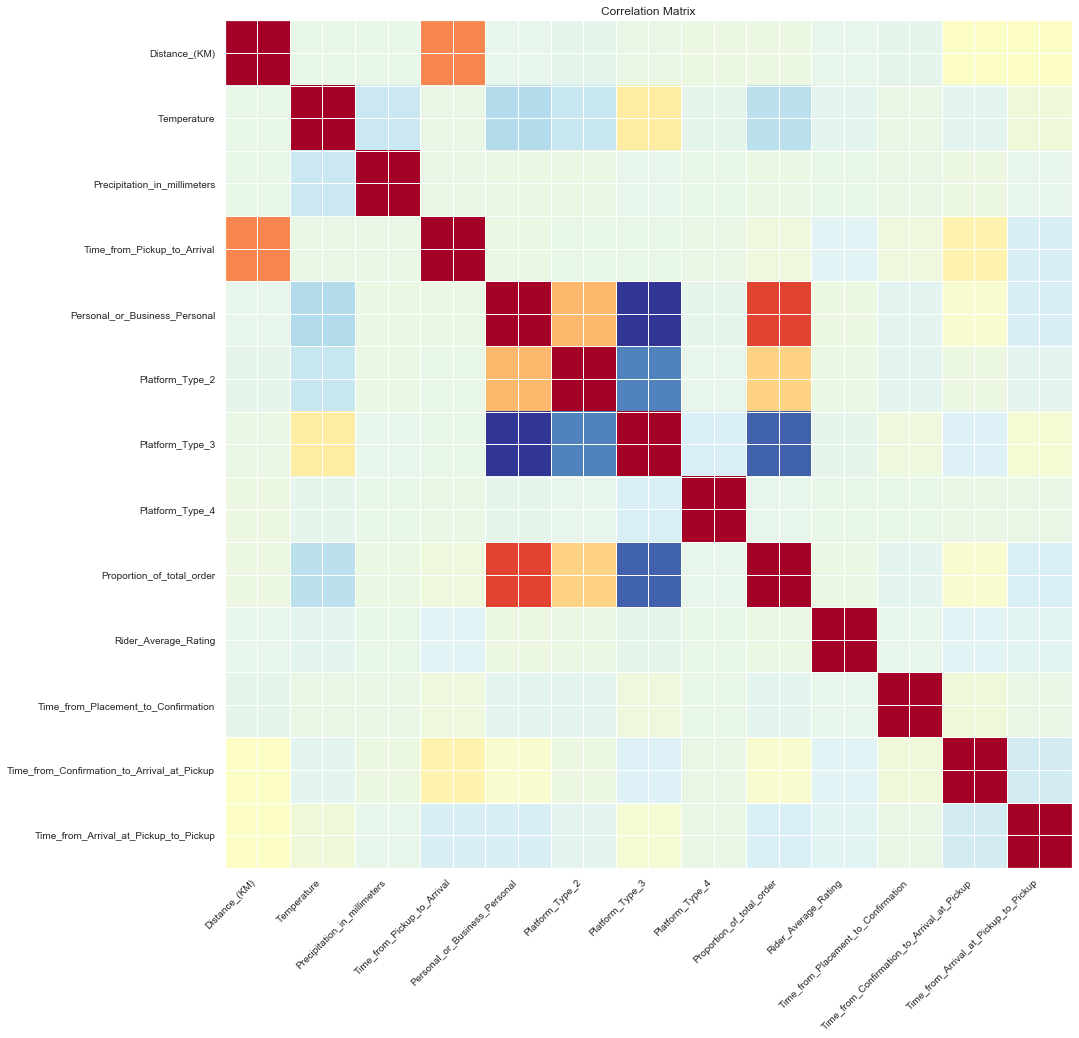

In [0]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(train_set.corr(), xnames = train_set.corr().columns, ax = ax);

Consider drop borp-p or plat 3 for possibnle collinearty... Consider dropping 1 to build bettre model

In [0]:
train_set.describe()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,9.506533,23.258889,0.205839,1556.920947,0.180039,0.046224,0.851564,0.000943,0.150276,13.882520,445.456960,776.521438,744.186406
std,5.668963,3.222006,3.029194,987.270788,0.384229,0.209975,0.355540,0.030700,0.290111,0.916071,1681.658749,687.758556,761.216606
min,1.000000,11.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.001550,0.000000,-42.000000,0.000000,60.000000
25%,5.000000,21.400000,0.000000,882.000000,0.000000,0.000000,1.000000,0.000000,0.007407,13.600000,27.000000,303.000000,263.000000
50%,8.000000,23.258889,0.000000,1369.000000,0.000000,0.000000,1.000000,0.000000,0.018519,14.000000,69.000000,614.000000,491.000000
75%,13.000000,25.300000,0.000000,2040.000000,0.000000,0.000000,1.000000,0.000000,0.100000,14.300000,289.000000,1045.000000,929.000000
max,49.000000,32.100000,99.100000,7883.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.200000,176725.000000,6374.000000,5985.000000


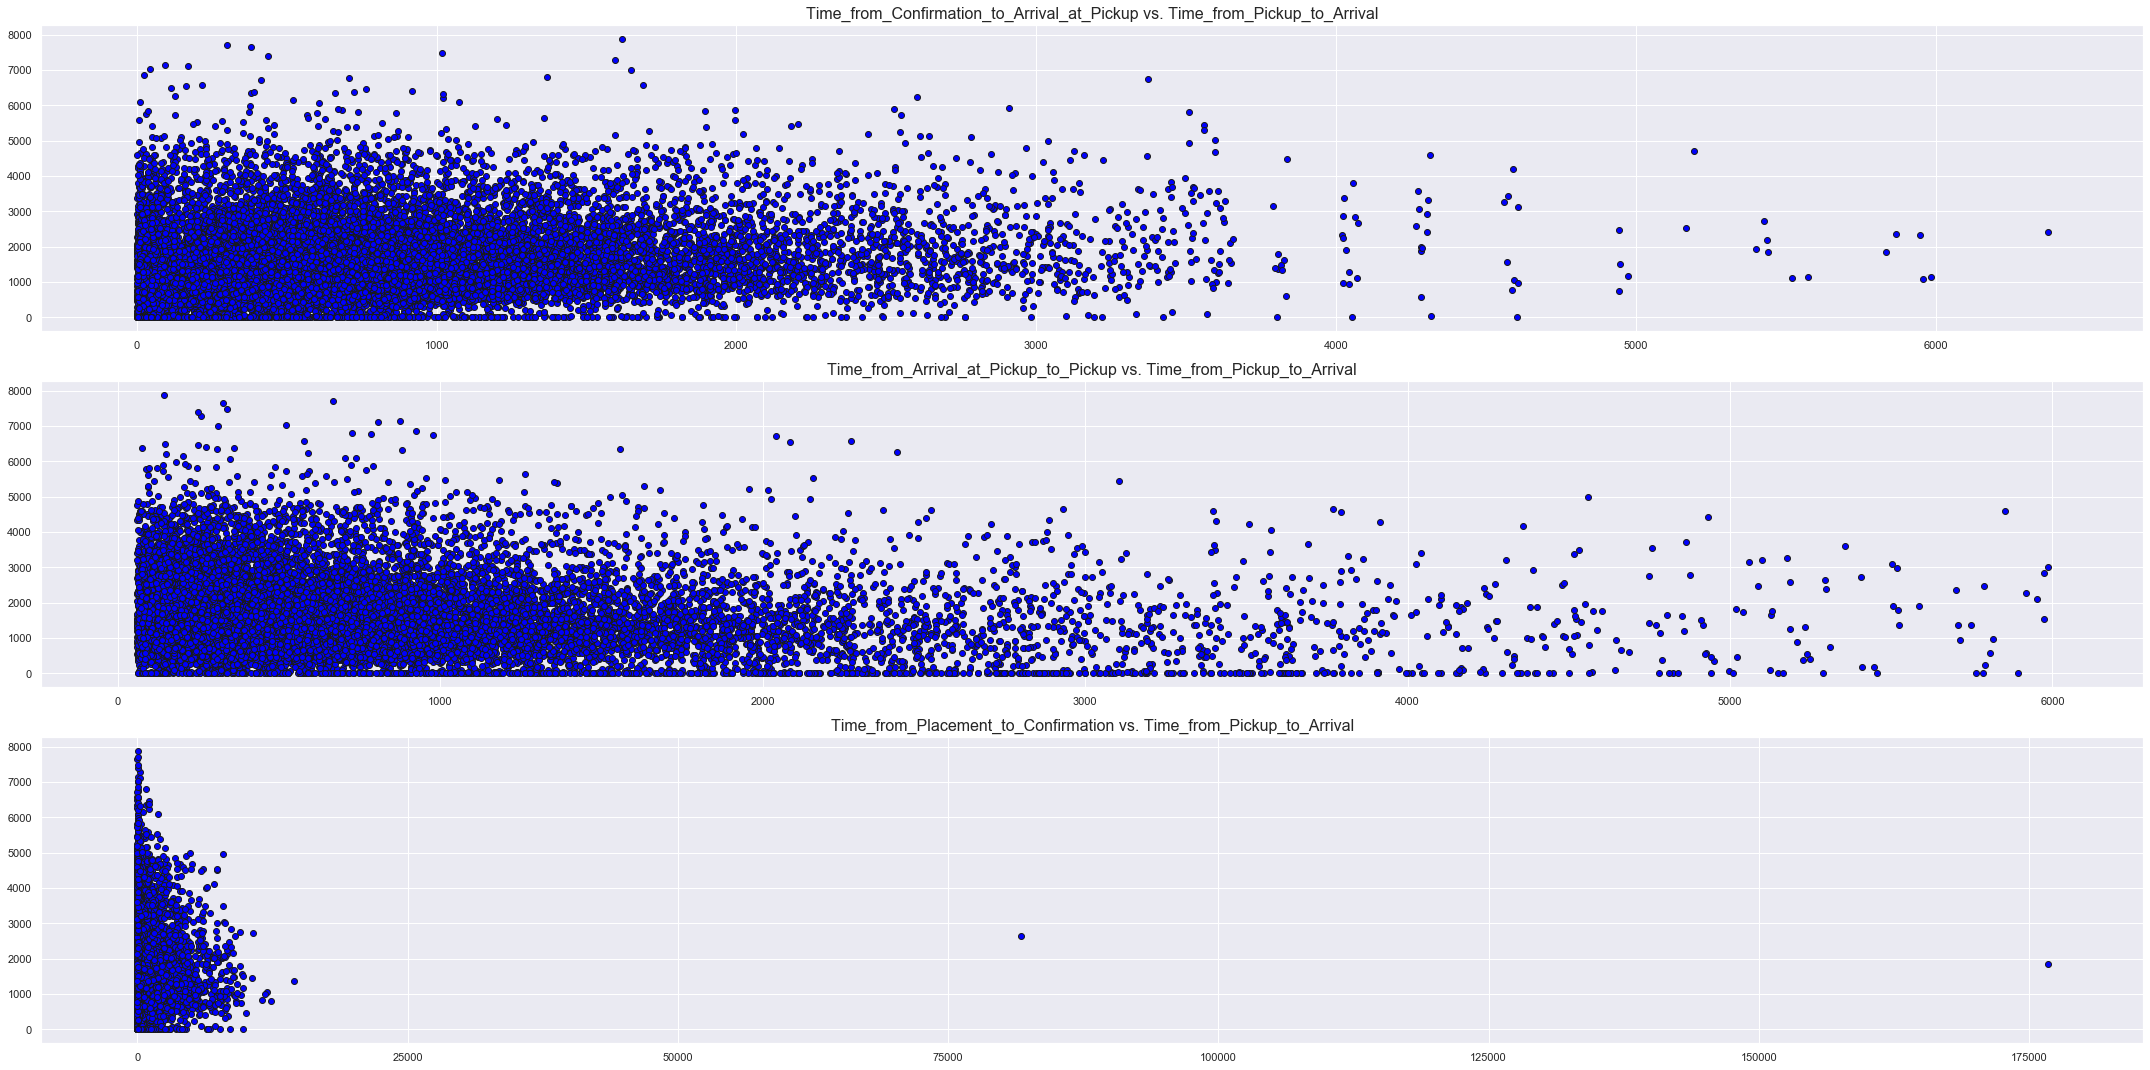

In [0]:
fig, axs = plt.subplots(3,1, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.iloc[:,-3:].columns):
    axs[index-1].set_title("{} vs. Time_from_Pickup_to_Arrival".format(column),fontsize=16)
    axs[index-1].scatter(x=train_set.iloc[:,-3:][column],y=train_set['Time_from_Pickup_to_Arrival'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

Try to explain outliers

##### Transforming unseen dataset

In [0]:
# Storing unchanged unseen data in new variable

unseen_set = pd.read_csv('Test.csv')
unseen_set.columns = [col.replace(" ","_") for col in unseen_set.columns] 
unseen_set.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imputer.fit(unseen_set.iloc[:,-7:-6])
unseen_set.iloc[:,-7:-6] = imputer.transform(unseen_set.iloc[:,-7:-6])

imputer2.fit(unseen_set.iloc[:,-6:-5])
unseen_set.iloc[:,-6:-5] = imputer2.transform(unseen_set.iloc[:,-6:-5])


unseen_set = pd.get_dummies(unseen_set, columns = ['Personal_or_Business', 'Vehicle_Type', 'Platform_Type'], drop_first=True)


unseen_set = unseen_set.set_index('Order_No')

user_id = (unseen_set.groupby('User_Id').count().iloc[:,0])

unseen_set['Proportion_of_total_order'] = [float(user_id[unseen_set['User_Id'][i]])**(-1) for i in range(len(unseen_set))]
unseen_set = unseen_set.drop(['User_Id'], axis='columns')
unseen_set['Rider_Average_Rating'] = [riders_set[riders_set['Rider Id'] == unseen_set['Rider_Id'][i]]['Average_Rating'].iloc[0] for i in range(len(unseen_set))]
unseen_set = unseen_set.drop(['Rider_Id'], axis=1)


unseen_set = unseen_set.drop(['Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long'], axis=1)


unseen_set['Placement_-_Time'] = pd.to_datetime(unseen_set['Placement_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Confirmation_-_Time'] = pd.to_datetime(unseen_set['Confirmation_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(unseen_set['Arrival_at_Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Pickup_-_Time'] = pd.to_datetime(unseen_set['Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')



unseen_set['Placement_-_Time'] = [unseen_set['Placement_-_Time'][i].replace(month=5, day=unseen_set['Placement_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Confirmation_-_Time'] = [unseen_set['Confirmation_-_Time'][i].replace(month=5, day=unseen_set['Confirmation_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Arrival_at_Pickup_-_Time'] = [unseen_set['Arrival_at_Pickup_-_Time'][i].replace(month=5, day=unseen_set['Arrival_at_Pickup_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Pickup_-_Time'] = [unseen_set['Pickup_-_Time'][i].replace(month=5, day=unseen_set['Pickup_-_Day_of_Month'][i]) for i in range(len(unseen_set))]

# Added data from '...Day_of_Month' columns to '...Time' columns (also affected by day on which order placed, confirmed etc), so can be removed
unseen_set = unseen_set.drop(['Placement_-_Day_of_Month','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month','Pickup_-_Day_of_Month'], axis=1)
unseen_set = unseen_set.drop(['Placement_-_Weekday_(Mo_=_1)','Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Weekday_(Mo_=_1)'], axis=1)

# Information in Arrival_at_Destination DAy_of_month and _weekday column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
#unseen_set = unseen_set.drop(['Arrival_at_Destination_-_Day_of_Month'], axis=1)
#unseen_set = unseen_set.drop(['Arrival_at_Destination_-_Weekday_(Mo_=_1)'], axis=1)

unseen_set['Time_from_Placement_to_Confirmation'] = [(unseen_set['Confirmation_-_Time'][i] - unseen_set['Placement_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]
unseen_set['Time_from_Confirmation_to_Arrival_at_Pickup'] = [(unseen_set['Arrival_at_Pickup_-_Time'][i] - unseen_set['Confirmation_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]
unseen_set['Time_from_Arrival_at_Pickup_to_Pickup'] = [(unseen_set['Pickup_-_Time'][i] - unseen_set['Arrival_at_Pickup_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]

# Information from '...Time' columns now represented in '...from...to...' columns, so can be dropped
unseen_set = unseen_set.drop(['Confirmation_-_Time','Placement_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time','Arrival_at_Pickup_-_Time'], axis=1)

# Information in Arrival_at_Destination_-_Time column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
#unseen_set = unseen_set.drop(['Arrival_at_Destination_-_Time'], axis=1)

unseen_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
Order_No,,,,,,,,,,,,
Order_No_19248,8,23.24612,0.0,0,0,1,0,0.022727,13.3,19.0,515.0,823.0
Order_No_12736,5,23.24612,0.0,0,0,1,0,0.009804,14.4,102.0,1270.0,310.0
Order_No_768,5,22.80000,0.0,0,0,1,0,0.038462,13.1,1011.0,495.0,1474.0
Order_No_15332,5,24.50000,0.0,0,0,1,0,0.500000,13.7,112.0,554.0,851.0
Order_No_21373,6,24.40000,0.0,0,0,1,0,0.041667,14.1,257.0,754.0,525.0


In [0]:
# Storing all columns as features

X_test = unseen_set.values

#### Storing dataset as variables

In [0]:
# Reordering dataframe for seperation into independent and dependent variables

dep_var = ['Time_from_Pickup_to_Arrival']
train_set = train_set[[c for c in train_set if c not in dep_var] 
       + dep_var]
train_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,
Order_No_4211,4,20.400000,0.0,0,0,1,0,0.005495,13.8,264.0,1477.0,1363.0,745
Order_No_25375,16,26.400000,0.0,1,0,1,0,0.125000,13.6,425.0,1021.0,227.0,1993
Order_No_1899,3,23.258889,0.0,0,0,1,0,0.006173,12.5,199.0,410.0,209.0,455
Order_No_9336,9,19.200000,0.0,0,0,1,0,0.013514,14.5,31.0,711.0,310.0,1341
Order_No_27883,9,15.400000,0.0,1,0,0,0,1.000000,14.1,60.0,455.0,90.0,1214


In [0]:
# Storing data as variables

X = train_set.iloc[:, :-1].values
y = train_set.iloc[:, -1].values

#### Creating dataset with z-score validated predictor values

In [0]:
# Necessary for running through RIDGE and LASSO regression

# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler
# create scaler object
scaler = StandardScaler()


# create scaled version of the predictors of training/validation data(there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# create scaled version of the predictor variables of unseen data
X_test_scaled = scaler.fit_transform(X_test)

##### Test/Validation

In [0]:
# Creating a validation set from the data

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Creating validation set for standardised data
X_std_train, X_std_val, y_std_train, y_std_val = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

##### Training LASSO regression model on training data

In [0]:
# Training model on standardised training set

# import LASSO module
from sklearn.linear_model import Lasso

# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# train the LASSO model
lasso.fit(X_std_train, y_std_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# extract intercept from model
intercept1 = float(lasso.intercept_)
# extract coefficient from model
coeff1 = pd.DataFrame(lasso.coef_, train_set.columns[:-1], columns=['Coefficient'])

##### Training ridge regression model on training data

In [0]:
# Training model on standardised training set

# import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

# create ridge model
ridge = Ridge()

# train the model
ridge.fit(X_std_train, y_std_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
# extract intercept from model
intercept2 = float(ridge.intercept_)
# extract coefficient from model
coeff2 = pd.DataFrame(ridge.coef_, train_set.columns[:-1], columns=['Coefficient'])

In [0]:
# extract intercept
print("Intercept_lasso:", float(intercept1))
print("Intercept_ridge:", float(intercept2))

Intercept_lasso: 1556.4021140183709
Intercept_ridge: 1556.4022646839874


In [0]:
coeff_compare = pd.merge(coeff1, coeff2, left_index=True, right_index=True, suffixes=('_lasso', '_ridge'))
coeff_compare 

,Coefficient_lasso,Coefficient_ridge
Distance_(KM),576.507046,576.482569
Temperature,18.398428,18.409008
Precipitation_in_millimeters,5.905600,5.918538
Personal_or_Business_Personal,0.363858,0.394149
Platform_Type_2,5.219849,5.237407
Platform_Type_3,14.223606,14.269039
Platform_Type_4,-8.310553,-8.315962
Proportion_of_total_order,12.628454,12.639373
Rider_Average_Rating,-38.618553,-38.625933
Time_from_Placement_to_Confirmation,25.781852,25.788675


No coeffecients for predictor variable reduced to zero, therefore none can be dropped based off of this information

##### Training linear regression model on training data

In [0]:
# Training model on training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# extract intercept from model
intercept3 = float(regressor.intercept_)
# extract coefficient from model
coeff3 = pd.DataFrame(regressor.coef_, train_set.columns[:-1], columns=['Coefficient'])
intercept3

1012.5669727999501

In [0]:
coeff_compare = pd.merge(coeff_compare, coeff3, left_index=True, right_index=True)#, suffixes=('_least_squares'))
#coeff_compare['Coeffecient'] = coeff_compare['Coeffecient_least_squares']
coeff_compare

,Coefficient_lasso,Coefficient_ridge,Coefficient
Distance_(KM),576.507046,576.482569,101.699560
Temperature,18.398428,18.409008,5.714030
Precipitation_in_millimeters,5.905600,5.918538,1.953998
Personal_or_Business_Personal,0.363858,0.394149,1.027047
Platform_Type_2,5.219849,5.237407,24.951025
Platform_Type_3,14.223606,14.269039,40.139789
Platform_Type_4,-8.310553,-8.315962,-270.917656
Proportion_of_total_order,12.628454,12.639373,43.567862
Rider_Average_Rating,-38.618553,-38.625933,-42.168124
Time_from_Placement_to_Confirmation,25.781852,25.788675,0.015337


##### Predicting test set results

In [0]:
# Storing predicted dependent variable results from valuation set of predictor variables

y_lin_pred = regressor.predict(X_val)
y_rdge_pred = ridge.predict(X_std_val)
y_lsso_pred = lasso.predict(X_std_val)

In [0]:
# Storing predicted dependent variable results from unseen set of predictor variables

sub_pred = regressor.predict(X_test)
sub_rdge_pred = ridge.predict(X_test_scaled)
sub_lsso_pred = lasso.predict(X_test_scaled)

##### Evaluating Regression Model

In [0]:
from sklearn import metrics
from math import sqrt

# dictionary of results
results_dict = {'Test RMSE':
                    {               
                        "Least Squares": sqrt(metrics.mean_squared_error(y_val, y_lin_pred)),
                        "Ridge": sqrt(metrics.mean_squared_error(y_val, y_rdge_pred)),
                        "LASSO": sqrt(metrics.mean_squared_error(y_val, y_lsso_pred))
                    }
                }
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

# view the results
results_df

,Test RMSE
LASSO,773.957233
Least Squares,773.957608
Ridge,773.957492


Is there any difference? No? Does that mean our data cleaning was shite?

##### Storing predicted dataframe?


Using ridge model

In [0]:
# Storing last column into new variable and displaying
unseen_set['Time_from_Pickup_to_Arrival'] = sub_rdge_pred
            
unseen_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,
Order_No_19248,8,23.24612,0.0,0,0,1,0,0.022727,13.3,19.0,515.0,823.0,1365.169209
Order_No_12736,5,23.24612,0.0,0,0,1,0,0.009804,14.4,102.0,1270.0,310.0,1207.311957
Order_No_768,5,22.80000,0.0,0,0,1,0,0.038462,13.1,1011.0,495.0,1474.0,967.618714
Order_No_15332,5,24.50000,0.0,0,0,1,0,0.500000,13.7,112.0,554.0,851.0,1064.652014
Order_No_21373,6,24.40000,0.0,0,0,1,0,0.041667,14.1,257.0,754.0,525.0,1223.237848


In [0]:
submission = unseen_set['Time_from_Pickup_to_Arrival']
submission

Order_No
Order_No_19248    1365.169209
Order_No_12736    1207.311957
Order_No_768       967.618714
Order_No_15332    1064.652014
Order_No_21373    1223.237848
                     ...     
Order_No_3612     1088.224881
Order_No_7657     3026.861808
Order_No_1969     1682.408346
Order_No_10591    2596.559635
Order_No_1603     1465.178130
Name: Time_from_Pickup_to_Arrival, Length: 7068, dtype: float64

In [0]:
submission.to_csv('submission2.csv')

# 

## 4.2 Model2

## 4.3 Model3

## 4.4 Model4

# 5. Comparison/ discussion of Models
<font color='green'> give recap of important findings/observations </font>
- Insights

# 6. Conclusion
- restate the questions from your introduction.
- Restate important results.
- Include any recommendations for additional data as needed


References: 
1. Zindi

[Medium report](https://medium.com/@yrnigam/how-to-write-a-data-science-report-181bd49d8f4d)

[Udacity](https://career-resource-center.udacity.com/portfolio/data-science-reports)